<h1>Data</h1>
<h2>parameters</h2>
This module provide a set of random parameters alpha, beta, a and b. Each {alpha, beta, a, b} will be used to solve one problem.

In [4]:
from data import RandomParameters


number_of_problems = 500
parameters = RandomParameters(
    parameters_size=number_of_problems)

# parameters can be visualized as a dataframe 
parameters 

      alpha      beta         a         b
0  0.930998  0.868303  0.462024  2.808883
1  0.752245  0.091398  1.716771  0.337351
2  0.289839  0.310160  2.950188  2.510885
3  0.212365  0.405017  1.992162  0.928750
4  0.404448  0.632360  0.825526  0.922993

<h2>data_generator</h2>
We first considere a grid and extract a sample of points from it.

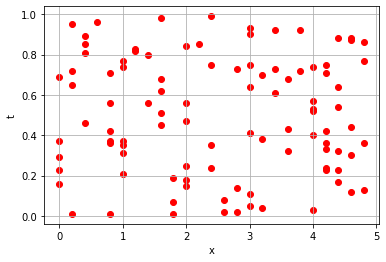

In [5]:
from direct_problem import Grid

import matplotlib.pyplot as plt

grid = Grid(
    x_min=0,
    x_max=5,
    delta_x=0.2,
    t_max=1,
    delta_t=0.01
)

sample_size = 100

x, t = grid.random_sample(size=sample_size)

def show_sample_size(x, t):
    plt.scatter(x, t, c='r')
    plt.grid()
    plt.xlabel("x")
    plt.ylabel("t")

show_sample_size(x, t)

Then we generate the data by solving a problem for each $\{\alpha_i,\ \beta_i,\ a_i,\ b_i\}$ in the parameters set.

In [6]:
import numpy as np

from data import DataGenerator


f = lambda x: np.maximum(2-x, 0)

data_generator = DataGenerator(grid, parameters, solution_at_t_equal_zero=f)

# Provide raw solutions
raw_solution = data_generator.generate_data()


<h2>Illustration</h2>
Below, one can see an illustration of what an item of input data looks like. The blue surface is a solution ($u$) obtained by the solver an red crosses are the values of the solution on the sampled grid.

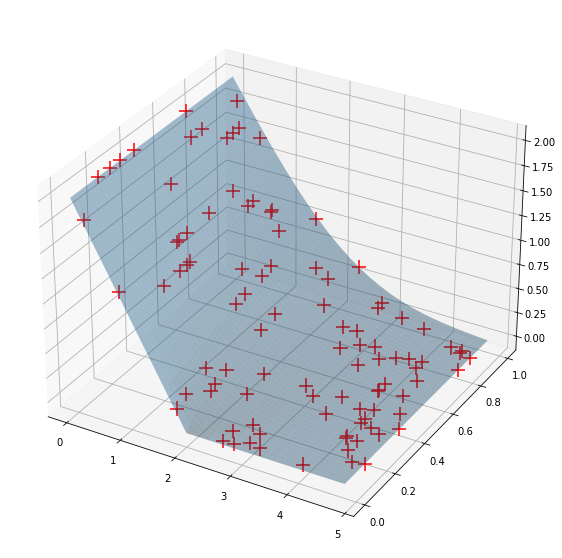

In [7]:
# Here is an illustration of what one item of input data looks like:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
T, X = np.meshgrid(x, t)
ax.scatter(x, t, raw_solution[0], c="r", marker="+", s=200, alpha=1)

# We solve the problem with set of parameters so we can see our data input
# next to the real solution
from direct_problem import ToyProblem, CSFTSolver
alpha, beta, a, b = parameters.parameters_array[0]
problem = ToyProblem(alpha, beta, a, b, f)
problem.set_grid(grid)
problem.init_boundaries()

solver = CSFTSolver(problem)
u = solver.solve()[0]

X, T = grid.meshed_grid()

ax.plot_surface(X, T, u, alpha=0.4)





Eventually and for training purpose, we'll ask pytorch to provide this raw data as a dataloader.

In [8]:
train_dl, test_dl = data_generator.dataloader(batch_size=50)